<a href="https://colab.research.google.com/github/bakkourysalma/Controle-continu-/blob/main/CLASSIFICATION_DE_SCORE_DE_CR%C3%89DIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✓ Toutes les bibliothèques importées avec succès!

Chargement des données depuis Kaggle... (Cette section est commentée car les données simulées sont utilisées)
Création de données synthétiques supplémentaires pour l'exercice...
✓ 1000 observations simulées créées

Aperçu des données simulées:
   Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   56         115186                  11793                  2   
1   69          44674                  10382                  3   
2   46          56271                   7764                  2   
3   32          83688                   6101                  3   
4   60         121076                   8843                  6   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                6             29            2                   58   
1                9             18            4                    6   
2                5             11            6                   16   
3                7

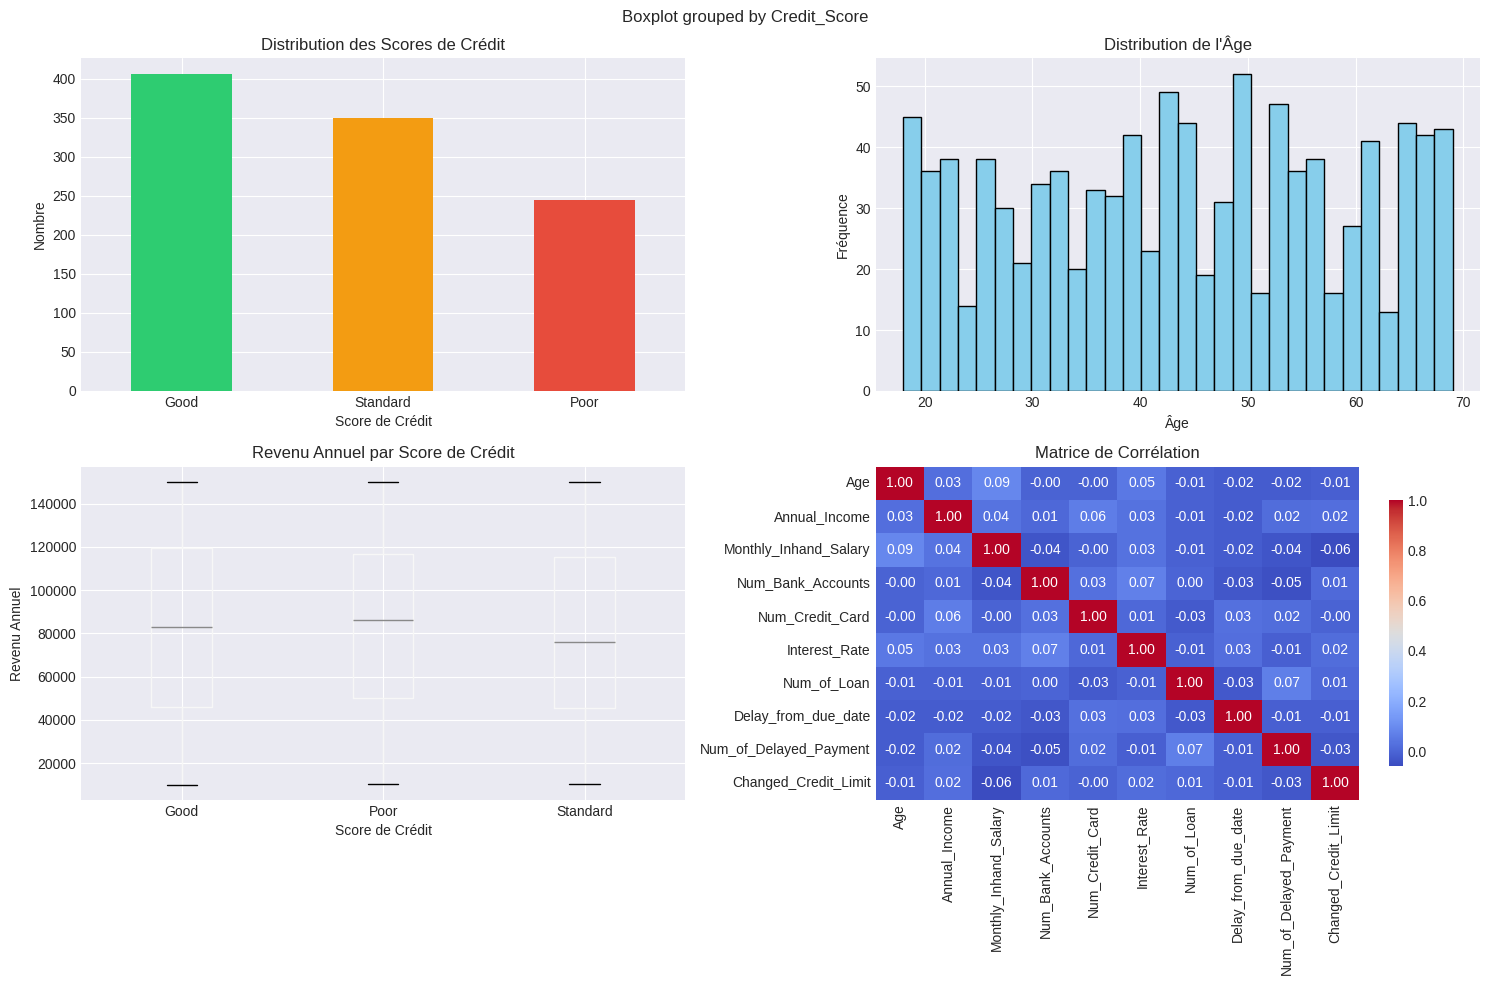

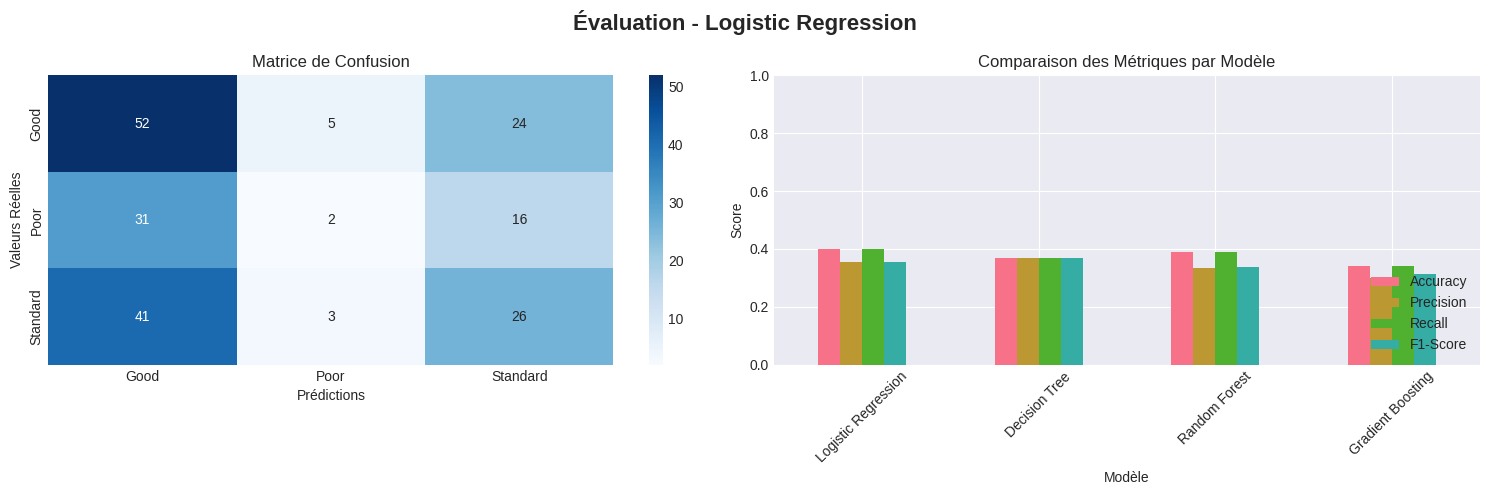

In [4]:
# ============================================================
# PROJET: CLASSIFICATION DE SCORE DE CRÉDIT
# ============================================================

# ============================================================
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ============================================================

# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données Kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Modèles ML
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Évaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

# Configuration
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Toutes les bibliothèques importées avec succès!\n")

# ============================================================
# 2. CHARGEMENT DES DONNÉES
# ============================================================

print("Chargement des données depuis Kaggle... (Cette section est commentée car les données simulées sont utilisées)")

# Charger le dataset
# file_path = "Credit score.csv"
# df = kagglehub.load_dataset(
#     KaggleDatasetAdapter.PANDAS,
#     "parisrohan/credit-score-classification",
#     file_path
# )

# print(f"✓ Données chargées: {df.shape[0]} lignes, {df.shape[1]} colonnes\n")
# print("Aperçu des données:")
# print(df.head())
# print("\n" + "="*60 + "\n")

# La variable df ne sera pas utilisée si la section Kaggle est commentée
# Pour éviter une erreur NameError plus tard si df est référencé accidentellement,
# on peut la définir à None ou la supprimer.
# Cependant, comme df_work utilise df_simulated, df n'est pas nécessaire.


# ============================================================
# 3. SIMULATION DE DONNÉES (Pour l'exercice)
# ============================================================

print("Création de données synthétiques supplémentaires pour l'exercice...")

np.random.seed(42)
n_samples = 1000

# Simuler des données supplémentaires
simulated_data = {
    'Age': np.random.randint(18, 70, n_samples),
    'Annual_Income': np.random.randint(10000, 150000, n_samples),
    'Monthly_Inhand_Salary': np.random.randint(1000, 12000, n_samples),
    'Num_Bank_Accounts': np.random.randint(1, 10, n_samples),
    'Num_Credit_Card': np.random.randint(1, 12, n_samples),
    'Interest_Rate': np.random.randint(4, 30, n_samples),
    'Num_of_Loan': np.random.randint(0, 10, n_samples),
    'Delay_from_due_date': np.random.randint(0, 60, n_samples),
    'Num_of_Delayed_Payment': np.random.randint(0, 25, n_samples),
    'Changed_Credit_Limit': np.random.uniform(0, 30, n_samples),
    'Num_Credit_Inquiries': np.random.randint(0, 15, n_samples),
    'Outstanding_Debt': np.random.uniform(0, 5000, n_samples),
    'Credit_Utilization_Ratio': np.random.uniform(20, 50, n_samples),
    'Credit_History_Age': np.random.randint(0, 400, n_samples),
    'Total_EMI_per_month': np.random.uniform(0, 1000, n_samples),
    'Amount_invested_monthly': np.random.uniform(0, 500, n_samples),
    'Monthly_Balance': np.random.uniform(0, 1000, n_samples),
    'Credit_Score': np.random.choice(['Good', 'Standard', 'Poor'], n_samples, p=[0.4, 0.35, 0.25])
}

df_simulated = pd.DataFrame(simulated_data)
print(f"✓ {n_samples} observations simulées créées")
print("\nAperçu des données simulées:")
print(df_simulated.head())
print("\n" + "="*60 + "\n")

# ============================================================
# 4. NETTOYAGE ET PRÉPARATION (Data Wrangling)
# ============================================================

print("NETTOYAGE ET PRÉPARATION DES DONNÉES\n")

# Utiliser les données simulées pour la suite
df_work = df_simulated.copy()

# 4.1 Informations générales
print("4.1 Informations sur le dataset:")
print(df_work.info())
print("\n")

# 4.2 Valeurs manquantes
print("4.2 Valeurs manquantes:")
missing = df_work.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
    # Imputation des valeurs manquantes
    imputer = SimpleImputer(strategy='median')
    numeric_cols = df_work.select_dtypes(include=[np.number]).columns
    df_work[numeric_cols] = imputer.fit_transform(df_work[numeric_cols])
    print("✓ Valeurs manquantes imputées")
else:
    print("✓ Aucune valeur manquante")
print("\n")

# 4.3 Doublons
print("4.3 Doublons:")
duplicates = df_work.duplicated().sum()
print(f"Nombre de doublons: {duplicates}")
if duplicates > 0:
    df_work = df_work.drop_duplicates()
    print("✓ Doublons supprimés")
print("\n")

# 4.4 Types de données
print("4.4 Distribution de la variable cible:")
print(df_work['Credit_Score'].value_counts())
print("\n" + "="*60 + "\n")

# ============================================================
# 5. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# ============================================================

print("ANALYSE EXPLORATOIRE DES DONNÉES\n")

# 5.1 Statistiques descriptives
print("5.1 Statistiques descriptives:")
print(df_work.describe())
print("\n")

# 5.2 Visualisations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analyse Exploratoire - Credit Score', fontsize=16, fontweight='bold')

# Distribution de la variable cible
df_work['Credit_Score'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0, 0].set_title('Distribution des Scores de Crédit')
axes[0, 0].set_xlabel('Score de Crédit')
axes[0, 0].set_ylabel('Nombre')
axes[0, 0].tick_params(axis='x', rotation=0)

# Distribution de l'âge
axes[0, 1].hist(df_work['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Distribution de l\'Âge')
axes[0, 1].set_xlabel('Âge')
axes[0, 1].set_ylabel('Fréquence')

# Revenu annuel vs Score
df_work.boxplot(column='Annual_Income', by='Credit_Score', ax=axes[1, 0])
axes[1, 0].set_title('Revenu Annuel par Score de Crédit')
axes[1, 0].set_xlabel('Score de Crédit')
axes[1, 0].set_ylabel('Revenu Annuel')

# Matrice de corrélation (top 10 features)
numeric_cols = df_work.select_dtypes(include=[np.number]).columns[:10]
corr = df_work[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Matrice de Corrélation')

plt.tight_layout()
plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Visualisations EDA sauvegardées dans 'eda_analysis.png'\n")
print("="*60 + "\n")

# ============================================================
# 6. SÉPARATION DES DONNÉES (Train / Test Split)
# ============================================================

print("SÉPARATION DES DONNÉES\n")

# Séparer features et target
X = df_work.drop('Credit_Score', axis=1)
y = df_work['Credit_Score']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Classes encodées: {dict(zip(le.classes_, le.transform(le.classes_)))}\n")

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"✓ Données d'entraînement: {X_train.shape[0]} observations")
print(f"✓ Données de test: {X_test.shape[0]} observations")
print(f"✓ Ratio: {X_train.shape[0]/len(X):.1%} train / {X_test.shape[0]/len(X):.1%} test\n")

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ Features normalisées avec StandardScaler\n")
print("="*60 + "\n")

# ============================================================
# 7. MODÉLISATION (Machine Learning)
# ============================================================

print("ENTRAÎNEMENT DES MODÈLES\n")

# Dictionnaire des modèles
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Stocker les résultats
results = {}

# Entraîner chaque modèle
for name, model in models.items():
    print(f"Entraînement: {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy
    }
    print(f"✓ {name} - Accuracy: {accuracy:.4f}\n")

print("="*60 + "\n")

# ============================================================
# 8. ÉVALUATION ET PERFORMANCE
# ============================================================

print("ÉVALUATION DES MODÈLES\n")

# Créer un DataFrame de comparaison
comparison_data = []
for name, result in results.items():
    y_pred = result['predictions']
    comparison_data.append({
        'Modèle': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    })

df_comparison = pd.DataFrame(comparison_data)
print("Comparaison des modèles:")
print(df_comparison.to_string(index=False))
print("\n")

# Meilleur modèle
best_model_name = df_comparison.loc[df_comparison['Accuracy'].idxmax(), 'Modèle']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"🏆 Meilleur modèle: {best_model_name}")
print(f"   Accuracy: {df_comparison.loc[df_comparison['Accuracy'].idxmax(), 'Accuracy']:.4f}\n")

# Rapport de classification détaillé
print("Rapport de classification (Meilleur modèle):")
print(classification_report(y_test, best_predictions, target_names=le.classes_))

# Matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle(f'Évaluation - {best_model_name}', fontsize=16, fontweight='bold')

# Matrice de confusion
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[0].set_title('Matrice de Confusion')
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Valeurs Réelles')

# Comparaison des modèles
df_comparison.set_index('Modèle')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', ax=axes[1], rot=45
)
axes[1].set_title('Comparaison des Métriques par Modèle')
axes[1].set_ylabel('Score')
axes[1].legend(loc='lower right')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualisations d'évaluation sauvegardées dans 'model_evaluation.png'\n")

# Importance des features (pour Random Forest)
if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("Top 10 Features les plus importantes (Random Forest):")
    print(feature_importance.head(10).to_string(index=False))

print("\n" + "="*60)
print("ANALYSE TERMINÉE AVEC SUCCÈS! 🎉")
print("="*60)
